# Import Libraries

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU


# Read Dataset -UNSW

In [2]:
df = pd.read_csv('UNSW_NB15_training-set.csv')
df=df.drop(['proto','service','state','attack_cat'], axis=1)
print(df)

X=df.drop(columns=['label'])
y=df['label']
print(X)


          id       dur  spkts  dpkts  sbytes  dbytes           rate  sttl  \
0          1  0.000011      2      0     496       0   90909.090200   254   
1          2  0.000008      2      0    1762       0  125000.000300   254   
2          3  0.000005      2      0    1068       0  200000.005100   254   
3          4  0.000006      2      0     900       0  166666.660800   254   
4          5  0.000010      2      0    2126       0  100000.002500   254   
...      ...       ...    ...    ...     ...     ...            ...   ...   
82327  82328  0.000005      2      0     104       0  200000.005100   254   
82328  82329  1.106101     20      8   18062     354      24.410067   254   
82329  82330  0.000000      1      0      46       0       0.000000     0   
82330  82331  0.000000      1      0      46       0       0.000000     0   
82331  82332  0.000009      2      0     104       0  111111.107200   254   

       dttl         sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0    

# Feature selection technique

In [3]:
names = df.head()
dtree = tree.DecisionTreeClassifier()
rfe = RFE(estimator=dtree, n_features_to_select=25)
rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print("Rank")
print(rfe.ranking_)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))
mm=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
print(mm)
#cols=[mm[0][1],mm[1][1],mm[2][1],mm[3][1],mm[4][1],mm[5][1],mm[6][1],mm[7][1],mm[8][1],mm[9][1],mm[10][1],mm[11][1],mm[12][1],mm[13][1],mm[14][1],mm[15][1]]
cols=[mm[0][1],mm[1][1],mm[2][1],mm[3][1],mm[4][1],mm[5][1],mm[6][1],mm[7][1],mm[8][1],mm[9][1],mm[10][1],mm[11][1],mm[12][1],mm[13][1],mm[14][1],mm[15][1],mm[16][1],mm[17][1],mm[18][1],mm[19][1],mm[20][1],mm[21][1],mm[22][1],mm[23][1],mm[24][1]]

print(cols)
print(df[cols])
X=df[cols]



[ True False False False  True  True  True  True False  True  True  True
  True  True  True False  True False False  True False  True  True  True
  True  True False False False  True  True  True  True  True False False
  True  True False False]
Rank
[ 1 10  8 11  1  1  1  1  4  1  1  1  1  1  1  2  1 12 13  1  9  1  1  1
  1  1  5  7  6  1  1  1  1  1  3 15  1  1 14 16]
Features sorted by their rank:
[(1, 'ackdat'), (1, 'ct_dst_ltm'), (1, 'ct_dst_sport_ltm'), (1, 'ct_dst_src_ltm'), (1, 'ct_flw_http_mthd'), (1, 'ct_src_dport_ltm'), (1, 'ct_src_ltm'), (1, 'ct_state_ttl'), (1, 'dbytes'), (1, 'dinpkt'), (1, 'djit'), (1, 'dload'), (1, 'dloss'), (1, 'dmean'), (1, 'dtcpb'), (1, 'id'), (1, 'rate'), (1, 'sbytes'), (1, 'sinpkt'), (1, 'sload'), (1, 'sloss'), (1, 'smean'), (1, 'sttl'), (1, 'synack'), (1, 'tcprtt'), (2, 'sjit'), (3, 'is_ftp_login'), (4, 'dttl'), (5, 'trans_depth'), (6, 'ct_srv_src'), (7, 'response_body_len'), (8, 'spkts'), (9, 'dwin'), (10, 'dur'), (11, 'dpkts'), (12, 'swin'), (13,

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply Standard scalar

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Apply feature reduction

In [6]:
# Set the n_components=5
principal=PCA(n_components=5)
X_train=principal.fit_transform(X_train)
X_test=principal.fit_transform(X_test)

# Check the dimensions of data after PCA
print(X_train)


[[-1.79356408  0.91060704 -0.50412573  0.99209658 -0.83320205]
 [-1.55214881 -1.51548005 -0.61541275  2.76103252  0.33624783]
 [-2.48356224 -1.04195461  1.22913697 -0.312622   -0.303287  ]
 ...
 [-1.70206219 -1.56988488  0.44500063 -0.30889592  0.2549927 ]
 [-1.83628989 -0.84666817  1.23387501 -0.19514467 -0.50789751]
 [ 7.73816088  0.17283004  2.85483799  0.23755583 -0.50664999]]


# Build DNN model

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6587/6587 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8302 - loss: 0.3829 - val_accuracy: 0.8806 - val_loss: 0.2788
Epoch 2/20
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8900 - loss: 0.2672 - val_accuracy: 0.8878 - val_loss: 0.2477
Epoch 3/20
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9021 - loss: 0.2322 - val_accuracy: 0.8949 - val_loss: 0.2476
Epoch 4/20
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9052 - loss: 0.2325 - val_accuracy: 0.8999 - val_loss: 0.2319
Epoch 5/20
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9084 - loss: 0.2254 - val_accuracy: 0.9066 - val_loss: 0.2296
Epoch 6/20
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9093 - loss: 0.2264 - val_accuracy: 0.9058 - val_loss: 0.2322
Epoch 7/20
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9103 - loss: 0.2331 - val_accuracy: 0.8982 - val_loss: 0.2488
Epoch 8/20
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9108 - loss: 0.2253 - val

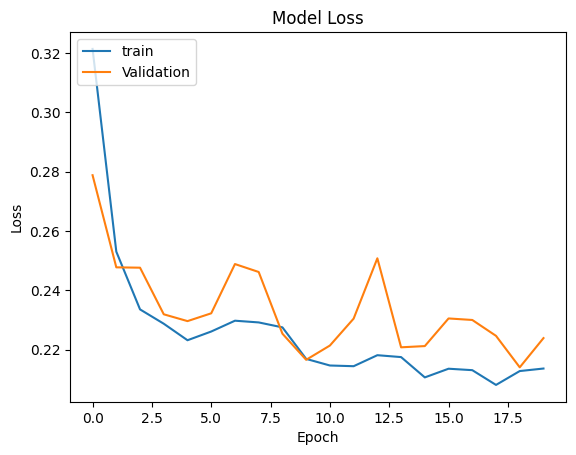

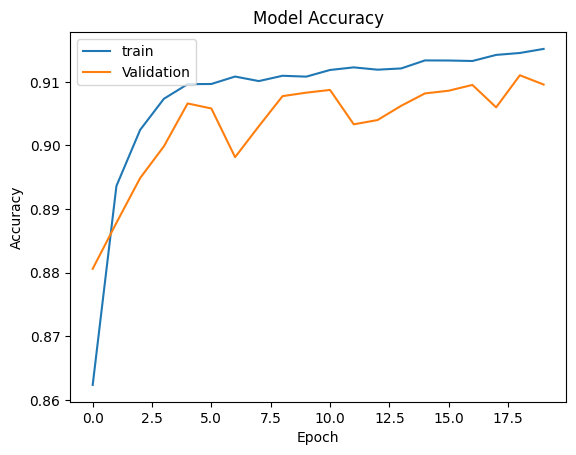

515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [7]:
model= Sequential()

model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(14, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train, epochs=20,batch_size=10,validation_data=(X_test, y_test))

#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')

plt.pause(5)
plt.show(block=False)
plt.close()

#train and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')

plt.pause(5)
plt.show(block=False)
plt.close()


y_pred=model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]


In [8]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("MSE VALUE FOR DNN IS %f "  % mse)
print("MAE VALUE FOR DNN IS %f "  % mae)
print("R-SQUARED VALUE FOR DNN IS %f "  % r2)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE VALUE FOR DNN IS %f "  % rms)


MSE VALUE FOR DNN IS 0.549523 
MAE VALUE FOR DNN IS 0.549523 
R-SQUARED VALUE FOR DNN IS -1.219871 
RMSE VALUE FOR DNN IS 0.741298 
